In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('Iris.csv')

In [27]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df = df.drop('Id', axis=1)

In [29]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
encoder = LabelEncoder()

In [32]:
df['Species'] = encoder.fit_transform(df['Species'])

In [33]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
df = df.drop('SepalLengthCm', axis=1)
df = df.drop('PetalWidthCm', axis=1)

In [35]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
0,3.5,1.4,0
1,3.0,1.4,0
2,3.2,1.3,0
3,3.1,1.5,0
4,3.6,1.4,0


In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

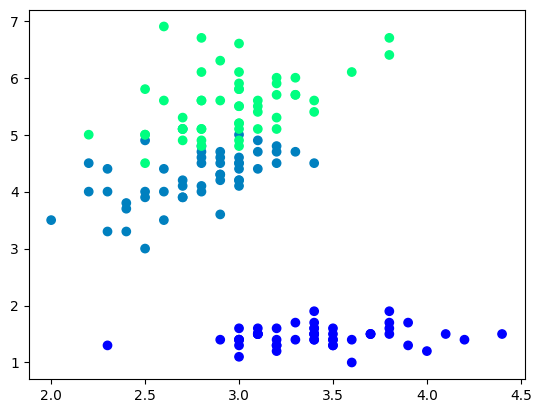

In [38]:
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'], c=df['Species'], cmap='winter')

In [39]:
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80:, :].sample(5)

In [40]:
df_train

,SepalWidthCm,PetalLengthCm,Species
90,2.6,4.4,1
61,3.0,4.2,1
20,3.4,1.7,0
65,3.1,4.4,1
25,3.0,1.6,0
137,3.1,5.5,2
42,3.2,1.3,0
146,2.5,5.0,2
27,3.5,1.5,0
149,3.0,5.1,2


In [41]:
df_val

,SepalWidthCm,PetalLengthCm,Species
72,2.5,4.9,1
83,2.7,5.1,1
0,3.5,1.4,0
124,3.3,5.7,2
41,2.3,1.3,0


In [42]:
df_test

,SepalWidthCm,PetalLengthCm,Species
7,3.4,1.5,0
60,2.0,3.5,1
2,3.2,1.3,0
93,2.3,3.3,1
13,3.0,1.1,0


In [43]:
x_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,2].values

Case 1 - Bagging

In [45]:
# Data for tree 1
df_bag = df_train.sample(10, replace=True)

x = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,2].values

df_bag

,SepalWidthCm,PetalLengthCm,Species
146,2.5,5.0,2
20,3.4,1.7,0
65,3.1,4.4,1
25,3.0,1.6,0
42,3.2,1.3,0
61,3.0,4.2,1
146,2.5,5.0,2
146,2.5,5.0,2
61,3.0,4.2,1
20,3.4,1.7,0


In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [47]:
dt_bag1 = DecisionTreeClassifier()

In [52]:
def evaluate(clf, x, y):
    clf.fit(x, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x, y, clf = clf, legend=2)
    y_pred = clf.predict(x_test)
    print(accuracy_score(y_test, y_pred))

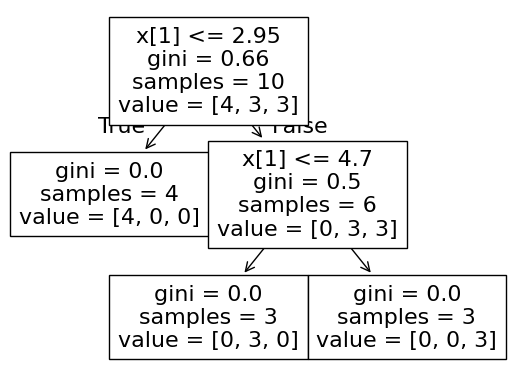

0.6


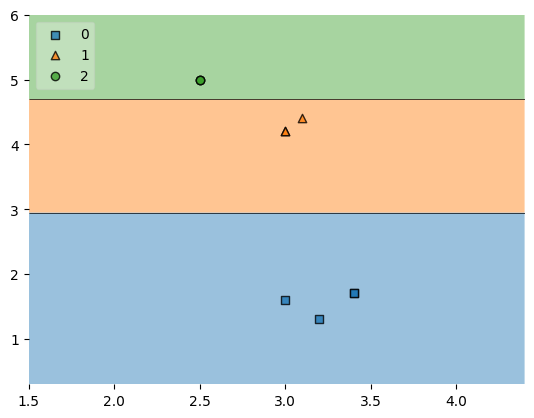

In [53]:
evaluate(dt_bag1, x, y)

In [54]:
# data for tree 2
df_bag = df_train.sample(8, replace=True)

x = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,2].values

df_bag

,SepalWidthCm,PetalLengthCm,Species
146,2.5,5.0,2
65,3.1,4.4,1
90,2.6,4.4,1
137,3.1,5.5,2
27,3.5,1.5,0
149,3.0,5.1,2
42,3.2,1.3,0
61,3.0,4.2,1


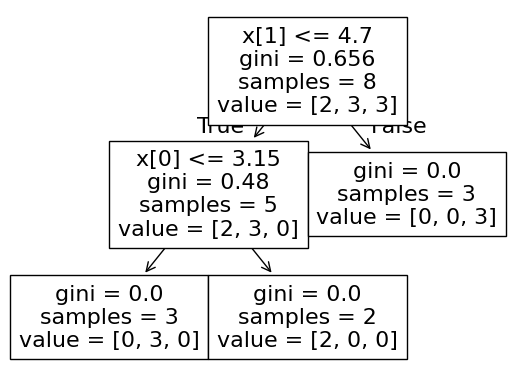

0.4


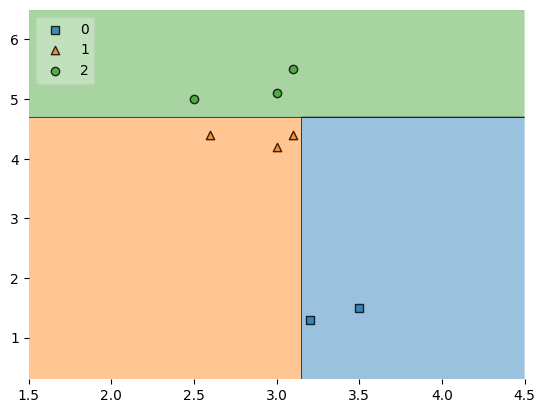

In [55]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, x, y)

In [56]:
# data for tree 3
df_bag = df_train.sample(8, replace=True)

x = df_bag.iloc[:,0:2].values
y = df_bag.iloc[:,2].values

df_bag

,SepalWidthCm,PetalLengthCm,Species
20,3.4,1.7,0
61,3.0,4.2,1
25,3.0,1.6,0
61,3.0,4.2,1
65,3.1,4.4,1
25,3.0,1.6,0
25,3.0,1.6,0
20,3.4,1.7,0


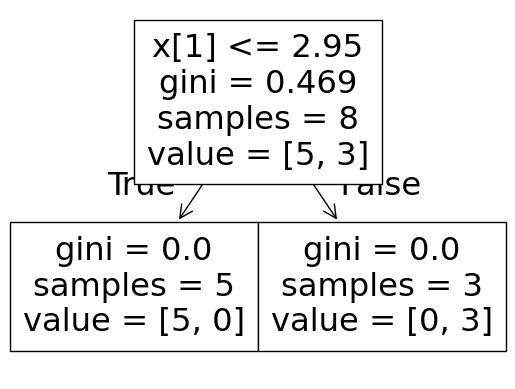

0.8


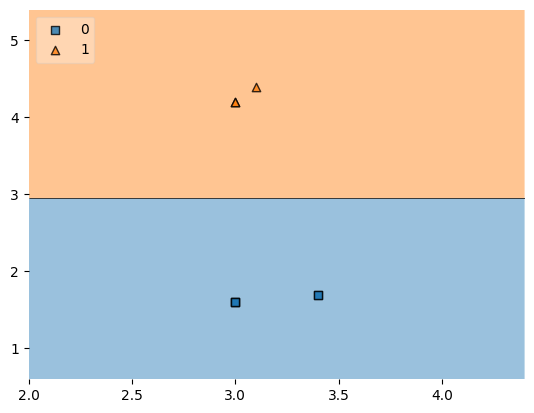

In [57]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, x, y)

In [58]:
df_test

,SepalWidthCm,PetalLengthCm,Species
7,3.4,1.5,0
60,2.0,3.5,1
2,3.2,1.3,0
93,2.3,3.3,1
13,3.0,1.1,0


In [60]:
print("Predictor 1", dt_bag1.predict(x_test))
print("Predictor 2", dt_bag2.predict(x_test))
print("Predictor 3", dt_bag3.predict(x_test))

Predictor 1 [2 2 0 2 0]
Predictor 2 [2 2 0 2 1]
Predictor 3 [1 1 0 1 0]
